In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
import math
from typing import Optional, List
from sortedcontainers import SortedDict
from Plasma import Plasma_Evolver
from scipy import interpolate
import itertools

In [3]:
N = 64
dt = 0.01
tmax = 5
driver = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0, d1 = 0.3, insertion=False, rk = True)

driver.evolve_plasma(tmax)


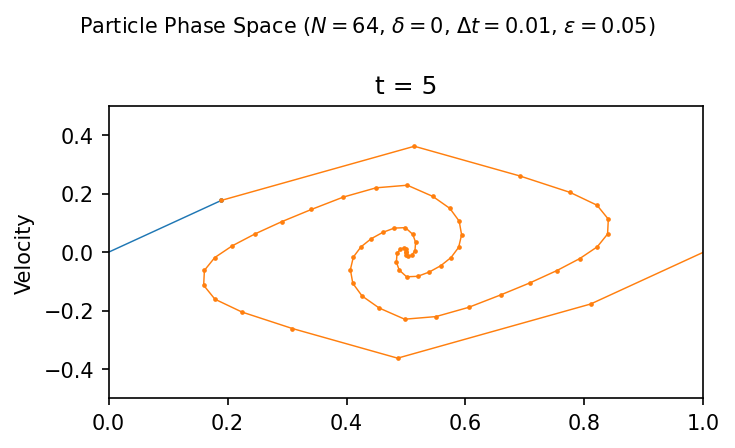

In [16]:
driver.plot_particles(times=(tmax,),periods = 1, zoom=False, markers_on=True, lines_off=False)



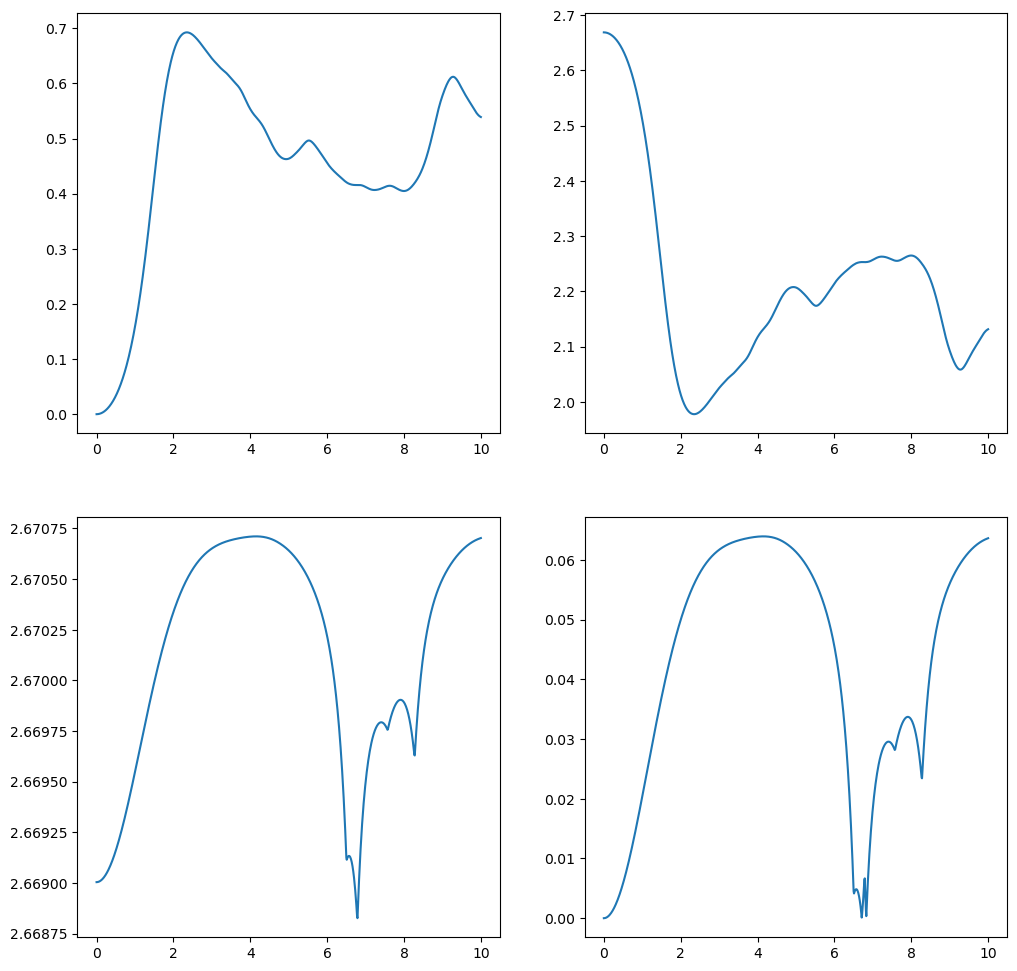

In [22]:
t = np.arange(0, tmax + 0.01, 0.01)


E0 = (driver.Ek_hist[0] + driver.Ep_hist[0])
E_net = np.array(driver.Ek_hist) + np.array(driver.Ep_hist)

E_error = np.abs(E_net - E0) / E0 * 100

fig, axs = plt.subplots(2, 2, figsize=(12,12))

axs[0,0].plot(t, driver.Ek_hist)
axs[0,1].plot(t, driver.Ep_hist)
axs[1,0].plot(t, E_net)
axs[1,1].plot(t, E_error)

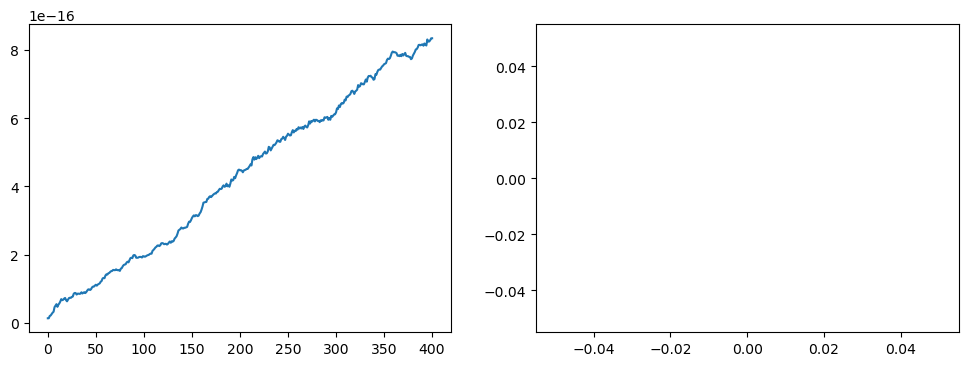

In [14]:
insertions = driver.ins_hist
symmetry = driver.sym_hist

fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].plot(symmetry)
axs[1].plot(np.cumsum(np.array(insertions)))

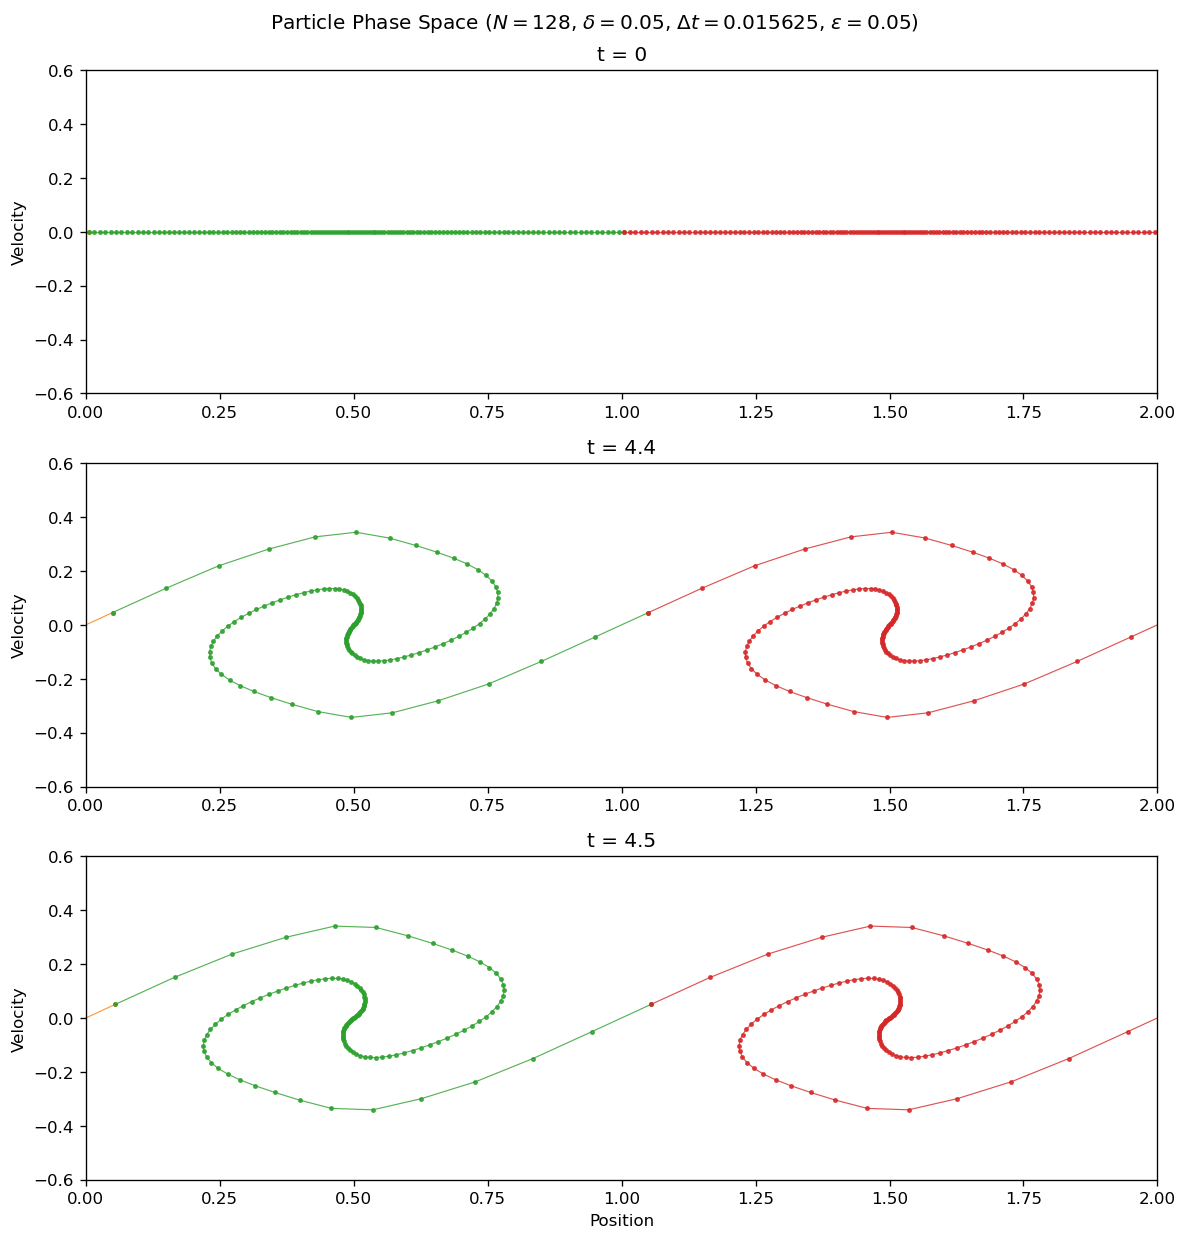

0.047808330447258254

In [54]:

driver.plot_particles(times=(0,4.4,4.5),periods = 2, zoom=False, markers_on=True)
driver.check_symmetry()


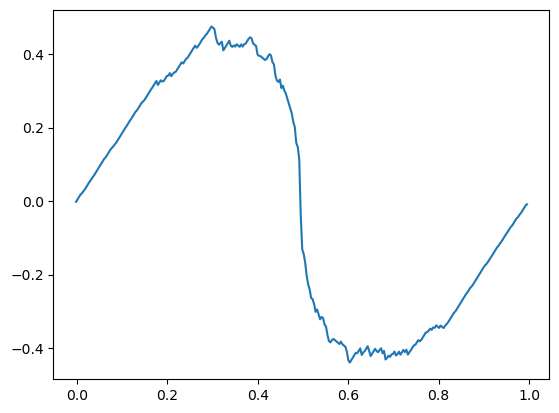

In [18]:
e, x = driver.calc_Efield()

plt.plot(x, e)

In [158]:
alphas1 = [0, 0.1, 0.2]
alphas2 = [0.8, 0.9, 1]

x1 = [0, 0.15776599, 0.29095008]
x2 = [0.70904992, 0.84223401, 1]
v1 = [0, 0.04893842, 0.07441561]
v2 = [-0.07441561, -0.04893842, 0]

int_x1 = interpolate.interp1d(alphas1, x1)
int_x2 = interpolate.interp1d(alphas2, x2)
int_v1 = interpolate.interp1d(alphas1, v1)
int_v2 = interpolate.interp1d(alphas2, v2)

a1_l = 0.5 * (alphas1[0] + alphas1[1]) 
a1_r = 0.5 * (alphas1[1] + alphas1[2]) 

a2_l = 0.5 * (alphas2[0] + alphas2[1]) 
a2_r = 0.5 * (alphas2[1] + alphas2[2]) 

new_x1_l = int_x1(0.05)
new_x1_r = int_x1(0.15)
new_v1_l = int_v1(0.05)
new_v1_r = int_v1(0.15)

new_x2_l = int_x2(0.85)
new_x2_r = int_x2(0.95)
new_v2_l = int_v2(0.85)
new_v2_r = int_v2(0.95)

print("New particle coordinates in left side of interval:")
print("Alpha = {}, ({}, {})".format(0.05, new_x1_l, new_x1_r))
print("Alpha = {}, ({}, {})".format(new_x1_l, new_x1_r))




[0.1, 0.3, 0.5, 0.7, 0.9]


In [15]:
filename = 'data.csv'

def append_pair_to_csv(x, arr):
    # Append the pair to the CSV file
    with open(filename, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([x, arr])

# Usage example
x = 4
arr = np.array([10, 11, 12])
append_pair_to_csv(x, arr)

In [14]:
import csv

filename = 'data.csv'
fieldnames = ['x', 'arr']

# Create a new CSV file with headers
with open(filename, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()